<a href="https://colab.research.google.com/github/tainguyen30/AI-2022-2023/blob/main/3_4_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras.datasets import cifar100

In [5]:
from keras.datasets.cifar100 import load_data

In [6]:
(x_train, y_train),(x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


In [7]:
import matplotlib.pyplot as plt
  

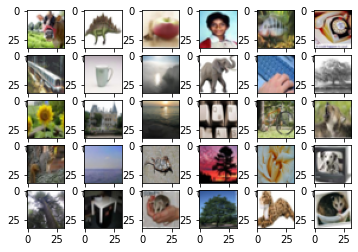

In [8]:
for i in range(30):
  plt.subplot(5,6,i+1)
  plt.imshow(x_train[i])

In [9]:
x_train = x_train.reshape((50000,32*32*3))
x_train = (x_train.astype('float32'))/255
x_test = x_test.reshape((10000,32*32*3))
x_test = (x_test.astype('float32'))/255

In [10]:
from keras.utils import to_categorical
# 100 = 100 bits
y_train = to_categorical(y_train,100)
y_test = to_categorical(y_test,100)

In [11]:
from keras import models
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(500, activation="relu",input_shape=(32*32*3,), name="layer1"))
model.add(Dense(500, activation="relu", name="layer2"))
model.add(Dense(100, activation="softmax", name="layerOut"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 500)               1536500   
                                                                 
 layer2 (Dense)              (None, 500)               250500    
                                                                 
 layerOut (Dense)            (None, 100)               50100     
                                                                 
Total params: 1,837,100
Trainable params: 1,837,100
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=15, batch_size=128)
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Test loss", test_loss)
print("Test accuracy", test_acc)

Epoch 1/15
391/391 [==============================] - 15s 37ms/step - loss: 4.1673 - accuracy: 0.0702
Epoch 2/15
391/391 [==============================] - 15s 39ms/step - loss: 3.7319 - accuracy: 0.1299
Epoch 3/15
391/391 [==============================] - 14s 37ms/step - loss: 3.5588 - accuracy: 0.1622
Epoch 4/15
391/391 [==============================] - 14s 36ms/step - loss: 3.4379 - accuracy: 0.1840
Epoch 5/15
391/391 [==============================] - 15s 38ms/step - loss: 3.3435 - accuracy: 0.1990
Epoch 6/15
391/391 [==============================] - 14s 36ms/step - loss: 3.2632 - accuracy: 0.2133
Epoch 7/15
391/391 [==============================] - 14s 36ms/step - loss: 3.1910 - accuracy: 0.2281
Epoch 8/15
391/391 [==============================] - 14s 36ms/step - loss: 3.1326 - accuracy: 0.2419
Epoch 9/15
391/391 [==============================] - 14s 36ms/step - loss: 3.0793 - accuracy: 0.2484
Epoch 10/15
391/391 [==============================] - 14s 36ms/step - loss: 3.018

In [13]:
model.save("/content/drive/MyDrive/Colab Notebooks/Image/model.h5")

In [21]:
from keras import models
from keras.models import load_model
from keras.utils.image_utils import img_to_array
from keras.utils import load_img
import matplotlib.pyplot as plt
import numpy as np


In [15]:
model100=load_model("/content/drive/MyDrive/Colab Notebooks/Image/model.h5")

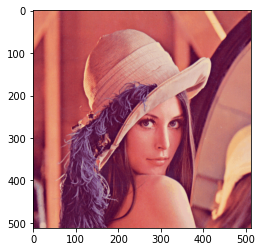

In [17]:
img1 = load_img("/content/drive/MyDrive/Colab Notebooks/Image/lena_color.jpg")
plt.imshow(img1)

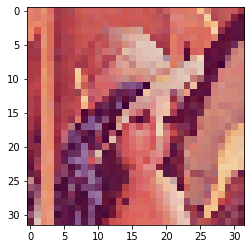

In [19]:
img1 = load_img("/content/drive/MyDrive/Colab Notebooks/Image/lena_color.jpg", target_size=(32,32))
plt.imshow(img1)

In [23]:
img1= img_to_array(img1)
img1=img1.reshape(1,32*32*3)
img1=img1.astype("float32")
img1=img1/255
np.argmax(model100.predict(img1),axis=1)

1/1 [==============================] - 0s 94ms/step


array([33])

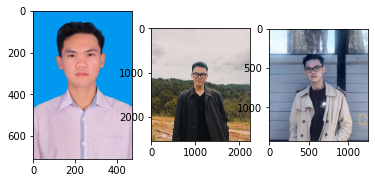

In [28]:
from matplotlib.image import imread
folder="/content/drive/MyDrive/Colab Notebooks/Image/Faces/"
for i in range(3):
  plt.subplot(1,3,i+1)
  filename= folder + "Tai" + str(i) +".jpg"
  img1 =imread(filename)
  plt.imshow(img1)
plt.show()